In [14]:
import time
import requests
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

from selenium import webdriver
from matplotlib import rc
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd

In [15]:
options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ["enable-logging"])
wd = webdriver.Chrome('./chromedriver.exe',options=options)

C:\Users\admin\AppData\Local\Temp\ipykernel_18268\2025538577.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome('./chromedriver.exe',options=options)


In [16]:
star_url ="https://www.starbucks.co.kr/store/store_map.do"
wd.get(star_url)

In [17]:
#셀레이움 4버전으로 변경되면서 함수원형 수정됨
#새 패키지 추가
from selenium.webdriver.common.by import By

In [18]:
#Tip!!
#wd.find_element_by_xpath('//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
wd.find_element(By.XPATH,'//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
time.sleep(2)
wd.find_element(By.XPATH,'//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[1]/a').click()
time.sleep(2)
wd.find_element(By.XPATH,'//*[@id="mCSB_2_container"]/ul/li[1]/a').click()

In [19]:
req = wd.page_source
soup = BeautifulSoup(req, "html.parser")
info = soup.find("div", id = "mCSB_3_container").find_all("li", class_ = 'quickResultLstCon')
len(info), info[0]

(588,
 <li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>)

In [20]:
name = info[0].find("strong").text.strip()
address = info[0].find(class_="result_details").text.strip()[:-9]
place = address.split(" ")[1]

name, address, place

('역삼아레나빌딩', '서울특별시 강남구 언주로 425 (역삼동)', '강남구')

In [21]:
star_info = []
for item in info :
    name = item.find("strong").text.strip()
    address = item.find(class_="result_details").text.strip()[:-9]
    place = address.split(" ")[1]
   
    data = {
        "가게명" : name,
        "주소" : address,
        "구" : place
    }
    star_info.append(data)
len(star_info)

588

In [22]:
df_star = pd.DataFrame(star_info, columns = ['가게명', '구', '주소'])
df_star.tail()

,가게명,구,주소
583,중랑구청,중랑구,서울특별시 중랑구 신내로 72
584,사가정역,중랑구,서울특별시 중랑구 면목로 310
585,상봉역,중랑구,서울특별시 중랑구 망우로 307 (상봉동)
586,묵동,중랑구,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층"
587,중화역,중랑구,서울특별시 중랑구 봉화산로 35


In [23]:
gu_list = list(set(df_star["구"]))
gu_list

['구로구',
 '도봉구',
 '중랑구',
 '관악구',
 '은평구',
 '마포구',
 '금천구',
 '동작구',
 '강북구',
 '노원구',
 '강동구',
 '서대문구',
 '강서구',
 '성북구',
 '중구',
 '강남구',
 '동대문구',
 '성동구',
 '광진구',
 '송파구',
 '영등포구',
 '양천구',
 '종로구',
 '서초구',
 '용산구']

In [24]:
#이디야
edi_url = "https://www.ediya.com/contents/find_store.html"
driver = webdriver.Chrome("./chromedriver.exe",options=options)
driver.get(edi_url)

C:\Users\admin\AppData\Local\Temp\ipykernel_18268\2069145288.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("./chromedriver.exe",options=options)


In [25]:
driver.find_element(By.XPATH,'//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
driver.find_element(By.XPATH,'//*[@id="keyword"]').clear
driver.find_element(By.XPATH,'//*[@id="keyword"]').send_keys("서울 강남구")
driver.find_element(By.XPATH,'//*[@id="keyword_div"]/form/button').click()

html = driver.page_source
soup = BeautifulSoup(html, "html.parser")

info = soup.find("ul", id = "placesList").find_all("li", class_='item')

info

[]

In [26]:
edi_info = []



for gu in gu_list:
    driver.find_element(By.XPATH,'//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
    driver.find_element(By.XPATH,'//*[@id="keyword"]').clear
    driver.find_element(By.XPATH,'//*[@id="keyword"]').send_keys("서울 " + gu)
    driver.find_element(By.XPATH,'//*[@id="keyword_div"]/form/button').click()
    
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    
    info = soup.find("ul", id = "placesList").find_all("li", class_='item')
    
    for item in info:
        name = item.find("dt").text
        address = item.find("dd").text.strip()
        place = address.split(" ")[1]
        

        data = {
            "가게명" : name,
            "구" : place,
            "주소" : address,
        }
        edi_info.append(data)
 
len(edi_info)

814

In [27]:
df_edi = pd.DataFrame(edi_info)
df_edi.tail()

,가게명,구,주소
809,청계산입구역점,서초구,서울 서초구 신원동
810,포이점,서초구,서울 서초구 마방로10길 42 (양재동)
811,함지박사거리점,서초구,서울 서초구 방배로 234 우신빌딩
812,혜화동로터리점,종로구,서울 종로구 혜화로 3-1 (혜화동)
813,혜화역점,종로구,서울 종로구 창경궁로 258-15 (명륜2가)


In [28]:
star_count = []
for item in gu_list:
    n = len(df_star.loc[df_star['구']==item])
    data = {
        "구" : item,
        "스벅 매장수" : n
    }
    star_count.append(data)
df_star_count = pd.DataFrame(star_count)
df_star_count

,구,스벅 매장수
0,구로구,12
1,도봉구,4
2,중랑구,7
3,관악구,12
4,은평구,10
5,마포구,35
6,금천구,13
7,동작구,11
8,강북구,6
9,노원구,13


In [29]:
edi_count = []
for item in gu_list:
    n = len(df_edi.loc[df_edi['구']==item])
    data = {
        "구" : item,
        "이디야 매장수" : n
    }
    edi_count.append(data)
df_edi_count = pd.DataFrame(edi_count)
df_edi_count

,구,이디야 매장수
0,구로구,28
1,도봉구,0
2,중랑구,0
3,관악구,28
4,은평구,27
5,마포구,38
6,금천구,46
7,동작구,2
8,강북구,20
9,노원구,31


In [30]:
sum_data = pd.merge(df_edi_count, df_star_count)
sum_data["매장 수 차이"] = sum_data["이디야 매장수"] - sum_data["스벅 매장수"]
sum_data

,구,이디야 매장수,스벅 매장수,매장 수 차이
0,구로구,28,12,16
1,도봉구,0,4,-4
2,중랑구,0,7,-7
3,관악구,28,12,16
4,은평구,27,10,17
5,마포구,38,35,3
6,금천구,46,13,33
7,동작구,2,11,-9
8,강북구,20,6,14
9,노원구,31,13,18


In [40]:
# from matplotlib import rc
# import matplotlib.font_manager as fm

# fm.get_fontconfig_fonts()

# # 디렉토리 및 파일 이름에 맞추어 변경
# font_location = './NanumGothic.ttf'

# font_name = fm.FontProperties(fname=font_location).get_name()
# rc('font', family=font_name)

In [43]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXNonUnicode',
 'DejaVu Sans Mono',
 'STIXSizeFiveSym',
 'DejaVu Sans Mono',
 'cmsy10',
 'STIXGeneral',
 'STIXSizeFourSym',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'STIXNonUnicode',
 'cmss10',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXNonUnicode',
 'DejaVu Serif',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXGeneral',
 'STIXGeneral',
 'cmr10',
 'DejaVu Serif Display',
 'STIXSizeThreeSym',
 'cmex10',
 'DejaVu Sans Display',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'cmb10',
 'STIXSizeThreeSym',
 'STIXSizeOneSym',
 'STIXSizeTwoSym',
 'cmtt10',
 'cmmi10',
 'DejaVu Sans',
 'DejaVu Serif',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'Comic Sans MS',
 'Malgun Gothic',
 'Courier New',
 'HoloLens MDL2 Assets',
 'Leelawadee UI',
 'Palatino Linotype',
 'Calibri',
 'Times New Roman',
 'Arial',
 'Microsoft PhagsPa',
 'Gulim',
 'Segoe UI',
 'Arial',
 'Segoe UI',
 'Gadugi',
 'Segoe UI',
 'Wingdings',
 'Microsoft New Tai Lue',
 'Tahoma',
 'Segoe UI',
 'Verdana',
 'Candara',
 'T

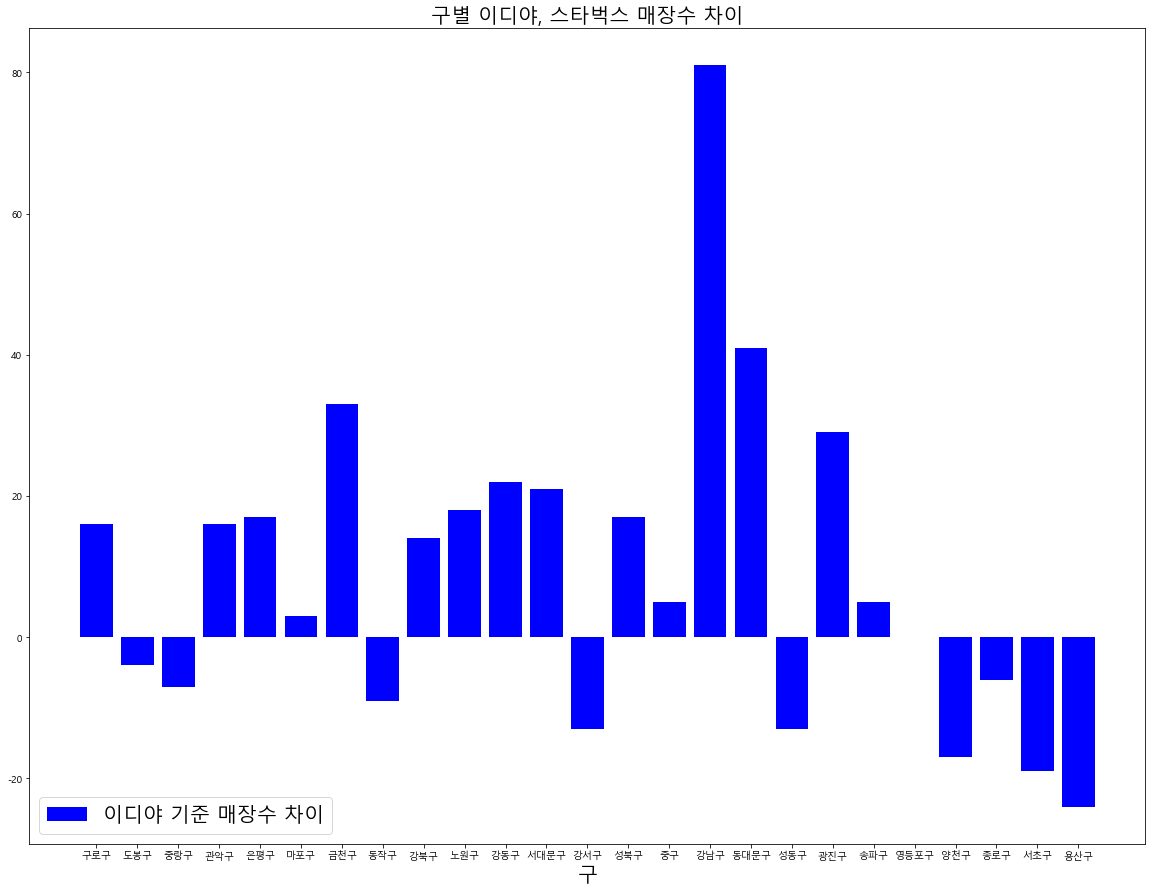

In [44]:
import matplotlib as mpl
a = sum_data["매장 수 차이"]
y = "ediya"

plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(20,15))
plt.bar(sum_data["구"], a, color = 'b', label ="이디야 기준 매장수 차이" )
plt.title("구별 이디야, 스타벅스 매장수 차이", fontsize = 20)
plt.xlabel("구", fontsize = 20)
plt.legend(loc ='lower left', fontsize = 20)
plt.show()